In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./RealData/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [3]:
train_df = pd.read_csv("./RealData/sign_mnist_train\sign_mnist_train.csv")
test_df = pd.read_csv("./RealData/sign_mnist_test\sign_mnist_test.csv")
test = pd.read_csv("./RealData/sign_mnist_test\sign_mnist_test.csv")
y = test['label']

In [4]:
train_df["label"].replace({24: 9}, inplace=True)
test_df["label"].replace({24: 9}, inplace=True)
# theres no 9 in gestres instead we use 24

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


C:\Users\elema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

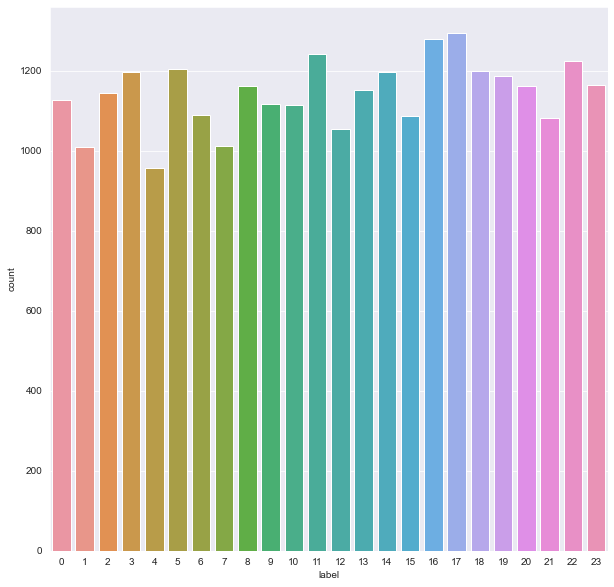

In [6]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

In [7]:
train_y = train_df['label']
test_y = test_df['label']

In [8]:
del train_df['label']
del test_df['label']

In [9]:
train_X = np.array(train_df.values.tolist())
test_X = np.array(test_df.values.tolist())


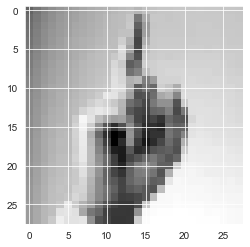

In [10]:
plt.imshow(np.array(train_X[0]).reshape(28, 28) , cmap = "gray")

In [11]:
len(train_X),len(test_X),len(train_y),len(test_y)

(27455, 7172, 27455, 7172)

In [12]:
train_X[0].shape

(784,)

In [5]:
import sys  
sys.path.insert(0, '../')
from utils import split_and_save_range

In [14]:
split_and_save_range(train_X_original=train_X , test_X_original = test_X, train_y_original = train_y, test_y_original = test_y, split_range = range(10))

shuffle :0
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
shuffle :1
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
shuffle :2
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
shuffle :3
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
shuffle :4
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
shuffle :5
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
shuffle :6
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
shuffle :7
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
shuffle :8
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
shuffle :9
(20775, 784) (6926, 784) (6926, 784) (20775,) (6926,) (6926,)
